# Customer Support Ticket Analytics

This notebook analyzes customer support tickets to understand response performance, SLA breaches, and workload drivers.


## Data Import & Transformations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/tickets.csv")
df.head()

,ticket_id,created_date,first_response_hours,resolution_hours,priority,category,status
0,1,2025-01-01,2,10,High,Login Issue,Closed
1,2,2025-01-01,5,24,Medium,Billing,Closed
2,3,2025-01-02,1,5,High,Login Issue,Closed
3,4,2025-01-02,12,48,Low,Feature Request,Open
4,5,2025-01-03,3,8,Medium,Performance,Closed


Step B: Data types + date parsing

In [2]:
df.info()
#converting string to datetime
df["created date"] = pd.to_datetime(df["created_date"])
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   ticket_id             10 non-null     int64
 1   created_date          10 non-null     str  
 2   first_response_hours  10 non-null     int64
 3   resolution_hours      10 non-null     int64
 4   priority              10 non-null     str  
 5   category              10 non-null     str  
 6   status                10 non-null     str  
dtypes: int64(3), str(4)
memory usage: 692.0 bytes
<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ticket_id             10 non-null     int64         
 1   created_date          10 non-null     str           
 2   first_response_hours  10 non-null     int64         
 3   resolution_hours      10 non-null

In [3]:
#Assume SLA: first response within 8 hours
SLA_HOURS = 8

#Adding a Boolean logic
df["sla_breached"] = df["first_response_hours"] > SLA_HOURS


df[["ticket_id", "first_response_hours", "sla_breached"]].head()

,ticket_id,first_response_hours,sla_breached
0,1,2,False
1,2,5,False
2,3,1,False
3,4,12,True
4,5,3,False


## Key Performance Indicators (KPIs)

In [4]:
kpis = {
    "total_tickets": len(df),
    "avg_first_response_hrs": round(float(df["first_response_hours"].mean()), 1),
    "avg_resolution_hrs": round(float(df["resolution_hours"].mean()), 1),
    "sla_breach_rate_pct": round(float(df["sla_breached"].mean() * 100), 1),
}
pd.DataFrame([kpis])


,total_tickets,avg_first_response_hrs,avg_resolution_hrs,sla_breach_rate_pct
0,10,7.0,27.5,30.0


## Ticket Volume by Category


In [5]:
#Tickets by category
tickets_by_category = df["category"].value_counts()

#Tickets by priority
tickets_by_priority = df["priority"].value_counts()

tickets_by_category, tickets_by_priority


(category
 Login Issue        3
 Billing            2
 Feature Request    2
 Performance        2
 General Inquiry    1
 Name: count, dtype: int64,
 priority
 High      4
 Medium    4
 Low       2
 Name: count, dtype: int64)

## SLA Breach Analysis by Priority

In [6]:
#SLA breaches by priority
sla_by_priority = (df.groupby("priority")["sla_breached"].mean() * 100).round(1).sort_values(ascending=False)
sla_by_priority


priority
Low       50.0
High      25.0
Medium    25.0
Name: sla_breached, dtype: float64

## SLA Breach Analysis by Priority


In [7]:
tickets_per_day = df.groupby(df["created_date"])["ticket_id"].count()
tickets_per_day


created_date
2025-01-01    2
2025-01-02    2
2025-01-03    2
2025-01-04    2
2025-01-05    2
Name: ticket_id, dtype: int64

In [8]:
print("=== KPIs ===")
print(kpis)

print("\n=== Tickets by Category ===")
print(tickets_by_category)

print("\n=== SLA Breach % by Priority ===")
print(sla_by_priority)

print("\n=== Tickets per Day ===")
print(tickets_per_day)


=== KPIs ===
{'total_tickets': 10, 'avg_first_response_hrs': 7.0, 'avg_resolution_hrs': 27.5, 'sla_breach_rate_pct': 30.0}

=== Tickets by Category ===
category
Login Issue        3
Billing            2
Feature Request    2
Performance        2
General Inquiry    1
Name: count, dtype: int64

=== SLA Breach % by Priority ===
priority
Low       50.0
High      25.0
Medium    25.0
Name: sla_breached, dtype: float64

=== Tickets per Day ===
created_date
2025-01-01    2
2025-01-02    2
2025-01-03    2
2025-01-04    2
2025-01-05    2
Name: ticket_id, dtype: int64


## Adding Charts

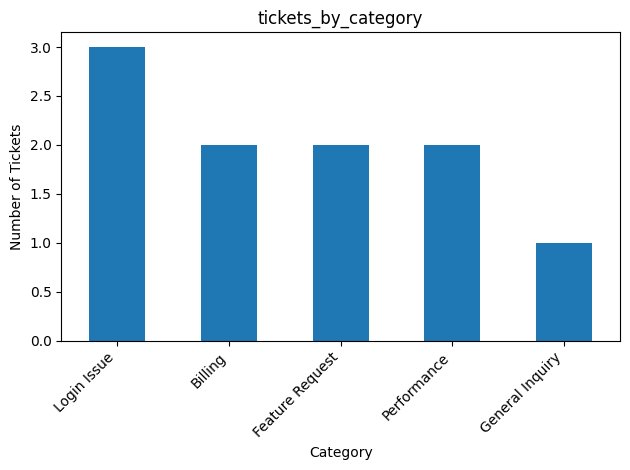

In [9]:
#Chart 1 - Tickets by Category

tickets_by_category = df["category"].value_counts()


plt.figure()
tickets_by_category.plot(kind="bar")
plt.title("tickets_by_category")
plt.xlabel("Category")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.savefig("/Users/jagritsandhu/Documents/DataEngineering/support-ticket-analytics/tickets_by_category.png")
plt.show()

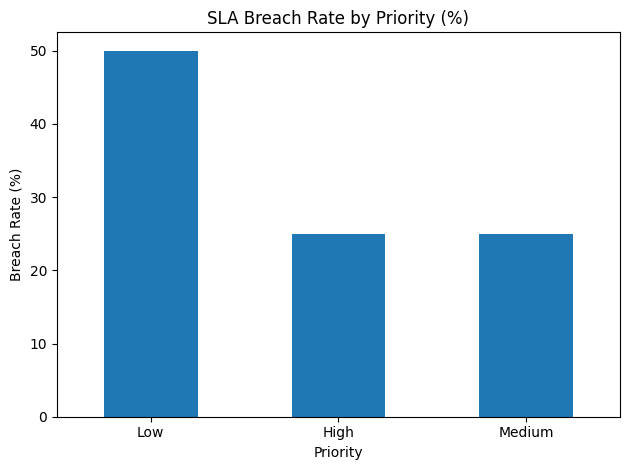

In [14]:
#Chart 2 - SLA breach rate by Priority

sla_by_priority = (df.groupby("priority")["sla_breached"].mean() * 100).round(1).sort_values(ascending=False)

plt.figure()
sla_by_priority.plot(kind="bar")
plt.title("SLA Breach Rate by Priority (%)")
plt.xlabel("Priority")
plt.ylabel("Breach Rate (%)")
plt.xticks(rotation=0)
plt.tight_layout()


plt.savefig("/Users/jagritsandhu/Documents/DataEngineering/support-ticket-analytics/sla_breach_by_priority.png", dpi=200)
plt.show()
